In [1]:
import pandas as pd

df = pd.read_csv("Raw primary.csv")

In [2]:
# Drop unnecessary columns
columns_to_drop = ['Target', 'Indicator Number', 'Metadata']
df = df.drop(columns=columns_to_drop, axis='columns')

In [3]:
# Pivoting the Indicator name column into multiple columns
df_pivoted = df.pivot_table(index=["Region", "Country", "Year"], columns="Indicator Name", values="Value").reset_index()

In [4]:
df.columns

Index(['Region', 'Country', 'Indicator Name', 'Year', 'Value'], dtype='object')

In [5]:
# Extracting gender information and remove it from the column names
df_pivoted.columns = df_pivoted.columns.str.replace(r'\s+\(%\w+\)$', '')
df_pivoted.columns.name = None

# Melting the pivoted DataFrame to reshape it
df_melted = df_pivoted.melt(id_vars=["Region", "Country", "Year"], var_name="Indicator Name", value_name="Value")

# Spliting the "Indicator Name" column into "Indicator" and "Gender"
df_melted[['Indicator', 'Gender']] = df_melted['Indicator Name'].str.extract(r'(.*)\s+(male|female)')

# Drop the "Indicator Name" column
df_melted = df_melted.drop(columns=["Indicator Name"])

# Pivot the melted DataFrame to create separate columns for each indicator and gender
df_final = df_melted.pivot_table(index=["Region", "Country", "Year", "Gender"], columns="Indicator", values="Value").reset_index()

column_order = ['Region', 'Country', 'Year', 'Gender'] + list(df_final.columns[4:])
df_final = df_final[column_order]


df_final.to_csv("KubeFlow Primary.csv")

In [6]:
df_final.columns

Index(['Region', 'Country', 'Year', 'Gender',
       'Completion rate, primary education,',
       'Gross enrolment ratio, early childhood education,',
       'Gross enrolment ratio, early childhood educational development programmes,',
       'Gross intake ratio to the last grade of primary education,',
       'Literacy rate, population 25-64 years,',
       'Percentage of children under 5 years experiencing positive and stimulating home learning environments,',
       'Percentage of students at the end of primary education who have their first or home language as language of instruction,',
       'Percentage of teachers in primary education who received in-service training in the last 12 months by type of training,',
       'Teacher attrition rate from primary education,'],
      dtype='object', name='Indicator')

In [7]:
df_final.shape

(4399, 13)

In [8]:
# Drop any duplicate rows from the merged dataframe
df_final = df_final.drop_duplicates()
df_final.shape

(4399, 13)

In [9]:
df_Addcol = pd.read_csv("primary metadata.csv")

columns_to_drop = ['Target', 'Indicator Number', 'Metadata']
df_Addcol = df_Addcol.drop(columns=columns_to_drop, axis='columns')

# Pivot the Indicator name column into multiple columns
df_Addcol = df_Addcol.pivot_table(index=["Region", "Country", "Year"], columns="Indicator Name", values="Value")

df_Addcol.to_csv("try1.csv")

In [10]:
print(df_Addcol.isnull().sum())

Indicator Name
Completion rate, primary education, female (%)                                                                                          896
Completion rate, primary education, male (%)                                                                                            896
Existence of funding mechanisms to reallocate education resources to disadvantaged populations                                         2227
Expenditure on education as a percentage of total government expenditure (%)                                                            520
Government expenditure on education as a percentage of GDP (%)                                                                          517
Gross enrolment ratio, early childhood education, female (%)                                                                            920
Gross enrolment ratio, early childhood education, male (%)                                                                              921
Gross

In [11]:
# first dataset
df1 = pd.read_csv("KubeFlow Primary.csv")

# second dataset 
df2 = pd.read_csv("try1.csv")

# Selecting the columns from the second dataset that to add to the first one
cols = ["Existence of funding mechanisms to reallocate education resources to disadvantaged populations", "Expenditure on education as a percentage of total government expenditure (%)", "Government expenditure on education as a percentage of GDP (%)","Proportion of teachers with the minimum required qualifications in primary education, adjusted gender parity index (GPIA)"]

# Merging the two dataframes on country and year, keeping only the selected columns from the second one
df_merged = pd.merge(df1, df2[["Country", "Year"] + cols], on=["Country", "Year"], how="left")

# Drop duplicate rows from the merged dataframe
df_merged = df_merged.drop_duplicates()



In [12]:
df_merged.shape

(4399, 18)

# Removing duplicate regions
As you can see below the region - Central Asia & Southern Asia are created separately but we a region Central and Southern Asia which has countries present in both/ so we will drop the separately created regions 

In [13]:

country_counts = df_merged["Country"].value_counts()

country = "India"

print("{} appears {} times in the first dataset.".format(country, country_counts[country]))

India appears 44 times in the first dataset.


In [14]:

regions = df_merged["Region"].unique()

print("The unique regions in the dataset are:")
print(regions)

The unique regions in the dataset are:
['SDG: Central Asia' 'SDG: Central and Southern Asia'
 'SDG: Eastern and South-Eastern Asia' 'SDG: Europe and Northern America'
 'SDG: Latin America and the Caribbean'
 'SDG: Northern Africa and Western Asia' 'SDG: Oceania'
 'SDG: Southern Asia' 'SDG: Sub-Saharan Africa']


In [15]:
# Grouping the dataframe by Region and get the unique countries in each group
country_groups = df_merged.groupby("Region")["Country"].unique()

print("The unique countries in each region are:")
print(country_groups)

The unique countries in each region are:
Region
SDG: Central Asia                        [Kazakhstan, Kyrgyzstan, Tajikistan, Turkmenis...
SDG: Central and Southern Asia           [Kazakhstan, Kyrgyzstan, Tajikistan, Turkmenis...
SDG: Eastern and South-Eastern Asia      [Brunei Darussalam, Cambodia, China, China, Ho...
SDG: Europe and Northern America         [Albania, Andorra, Austria, Belarus, Belgium, ...
SDG: Latin America and the Caribbean     [Anguilla, Antigua and Barbuda, Argentina, Aru...
SDG: Northern Africa and Western Asia    [Algeria, Armenia, Azerbaijan, Bahrain, Cyprus...
SDG: Oceania                             [Australia, Cook Islands, Fiji, Kiribati, Mars...
SDG: Southern Asia                       [Afghanistan, Bangladesh, Bhutan, India, Iran ...
SDG: Sub-Saharan Africa                  [Angola, Benin, Botswana, Burkina Faso, Burund...
Name: Country, dtype: object


In [16]:
# Drop the rows with the regions 'SDG: Central Asia' and 'SDG: Southern Asia'
df_merged = df_merged.drop(df_merged[(df_merged["Region"] == "SDG: Central Asia") | (df_merged["Region"] == "SDG: Southern Asia")].index)

In [17]:

country_counts = df_merged["Country"].value_counts()

country = "India"

print("{} appears {} times in the first dataset.".format(country, country_counts[country]))

India appears 22 times in the first dataset.


In [18]:
df_merged.shape

(4105, 18)

# Keeping only the devloping countries in the dataset

In [19]:
devloping_countries = ['Afghanistan',
'Albania',
'Algeria',
'American Samoa',
'Angola',
'Antigua and Barbuda',
'Argentina',
'Armenia',
'Azerbaijan',
'Bangladesh',
'Belarus',
'Belize',
'Benin',
'Bhutan',
'Bolivia',
'Bosnia and Herzegovina',
'Botswana',
'Brazil',
'Bulgaria',
'Burkina Faso',
'Burundi',
'Cambodia',
'Cameroon',
'Cape Verde',
'Central African Republic',
'Chad',
'Chile',
'China',
'Colombia',
'Comoros',
'Congo, Dem. Rep',
'Congo, Rep.',
'Costa Rica',
'Côte d’Ivoire',
'Cuba',
'Djibouti',
'Dominica',
'Dominican Republic',
'Ecuador',
'Egypt, Arab Rep.',
'El Salvador',
'Eritrea',
'Ethiopia',
'Fiji',
'Gabon',
'Gambia',
'Georgia',
'Ghana',
'Grenada',
'Guatemala',
'Guinea',
'Guinea-Bisau',
'Guyana',
'Haiti',
'Honduras',
'India',
'Indonesia',
'Iran, Islamic Rep.',
'Iraq',
'Jamaica',
'Jordan',
'Kazakhstan',
'Kenya',
'Kiribati',
'Korea, Dem Rep.',
'Kosovo',
'Kyrgyz Republic',
'Lao PDR',
'Latvia',
'Lebanon',
'Lesotho',
'Liberia',
'Libya',
'Lithuania',
'Macedonia, FYR',
'Madagascar',
'Malawi',
'Malaysia',
'Maldives',
'Mali',
'Marshall Islands',
'Mauritania',
'Mauritius',
'Mayotte',
'Mexico',
'Micronesia, Fed. Sts.',
'Moldova',
'Mongolia',
'Montenegro',
'Morocco',
'Mozambique',
'Myanmar',
'Namibia',
'Nepal',
'Nicaragua',
'Niger',
'Nigeria',
'Pakistan',
'Palau',
'Panama',
'Papua New Guinea',
'Paraguay',
'Peru',
'Philippines',
'Romania',
'Russian Federation',
'Rwanda',
'Samoa',
'São Tomé and Principe',
'Senegal',
'Serbia',
'Seychelles',
'Sierra Leone',
'Solomon Islands',
'Somalia',
'South Africa',
'Sri Lanka',
'St. Kitts and Nevis',
'St. Lucia',
'St. Vincent and the Grenadines',
'Sudan',
'Suriname',
'Swaziland',
'Syrian Arab Republic',
'Tajikistan',
'Tanzania',
'Thailand',
'Timor-Leste',
'Togo',
'Tonga',
'Tunisia',
'Turkey',
'Turkmenistan',
'Tuvalu',
'Uganda',
'Ukraine',
'Uruguay',
'Uzbekistan',
'Vanuatu',
'Venezuela',
'Vietnam',
'West Bank and Gaza',
'Yemen, Rep.',
'Zambia',
'Zimbabwe']


In [20]:
len(devloping_countries)

145

In [21]:
filtered_df = df_merged[df_merged['Country'].isin(devloping_countries)]

In [22]:
filtered_df.shape

(2353, 18)

In [23]:
# Saving the dataframe as a new CSV file
filtered_df.to_csv("Primary final.csv", index=False)


# Data Cleaning

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("Primary final.csv")

In [25]:
df.head()

,Unnamed: 0,Region,Country,Year,Gender,"Completion rate, primary education,","Gross enrolment ratio, early childhood education,","Gross enrolment ratio, early childhood educational development programmes,","Gross intake ratio to the last grade of primary education,","Literacy rate, population 25-64 years,","Percentage of children under 5 years experiencing positive and stimulating home learning environments,","Percentage of students at the end of primary education who have their first or home language as language of instruction,","Percentage of teachers in primary education who received in-service training in the last 12 months by type of training,","Teacher attrition rate from primary education,",Existence of funding mechanisms to reallocate education resources to disadvantaged populations,Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%),"Proportion of teachers with the minimum required qualifications in primary education, adjusted gender parity index (GPIA)"
0,98,SDG: Central and Southern Asia,Kazakhstan,2012,female,99.8,NaN,NaN,108.19,NaN,NaN,NaN,NaN,NaN,NaN,19.25,3.90,NaN
1,99,SDG: Central and Southern Asia,Kazakhstan,2012,male,99.7,NaN,NaN,106.88,NaN,NaN,NaN,NaN,NaN,NaN,19.25,3.90,NaN
2,100,SDG: Central and Southern Asia,Kazakhstan,2013,female,99.9,NaN,NaN,109.76,NaN,NaN,NaN,NaN,NaN,NaN,17.96,3.44,NaN
3,101,SDG: Central and Southern Asia,Kazakhstan,2013,male,99.8,NaN,NaN,108.90,NaN,NaN,NaN,NaN,NaN,NaN,17.96,3.44,NaN
4,102,SDG: Central and Southern Asia,Kazakhstan,2014,female,99.9,36.65,0.0,115.17,NaN,NaN,NaN,NaN,NaN,NaN,17.32,3.42,1.0


In [26]:
df.isnull().sum()

Unnamed: 0                                                                                                                      0
Region                                                                                                                          0
Country                                                                                                                         0
Year                                                                                                                            0
Gender                                                                                                                          0
Completion rate, primary education,                                                                                           655
Gross enrolment ratio, early childhood education,                                                                             889
Gross enrolment ratio, early childhood educational development programmes,                

In [27]:
df2 = df[~df.Year.isin([2022])]
#Excluding the year '2022' from the dataset

# Percentage of Missing Data

In [28]:
round((df2.isnull().sum()/len(df2) *100), 2)

Unnamed: 0                                                                                                                    0.00
Region                                                                                                                        0.00
Country                                                                                                                       0.00
Year                                                                                                                          0.00
Gender                                                                                                                        0.00
Completion rate, primary education,                                                                                          24.37
Gross enrolment ratio, early childhood education,                                                                            35.59
Gross enrolment ratio, early childhood educational development programmes,         

It's observed that about 17% of the dataset didnt have value for the target variable(Completion rate, lower secondary education,).Let's see the names of those countries that didn't have velues for the target variable


In [29]:
null_mask= df['Completion rate, primary education,'].isnull()
null_rows= df.loc[null_mask]
null_countries= null_rows.Country
print("About",null_countries.nunique(), "countries didnt have the target variable")
print("The name of those countries are :", null_countries.unique())

About 94 countries didnt have the target variable
The name of those countries are : ['Tajikistan' 'Uzbekistan' 'Afghanistan' 'Bangladesh' 'Bhutan' 'India'
 'Maldives' 'Nepal' 'Pakistan' 'Sri Lanka' 'Cambodia' 'China' 'Malaysia'
 'Mongolia' 'Philippines' 'Thailand' 'Timor-Leste' 'Albania' 'Belarus'
 'Bosnia and Herzegovina' 'Montenegro' 'Serbia' 'Ukraine'
 'Antigua and Barbuda' 'Argentina' 'Belize' 'Chile' 'Cuba' 'Dominica'
 'Ecuador' 'El Salvador' 'Grenada' 'Guatemala' 'Guyana' 'Honduras'
 'Jamaica' 'Nicaragua' 'Panama' 'Suriname' 'Algeria' 'Armenia'
 'Azerbaijan' 'Georgia' 'Jordan' 'Lebanon' 'Libya' 'Morocco'
 'Syrian Arab Republic' 'Tunisia' 'Fiji' 'Kiribati' 'Marshall Islands'
 'Palau' 'Samoa' 'Solomon Islands' 'Tonga' 'Tuvalu' 'Vanuatu' 'Angola'
 'Benin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Djibouti' 'Eritrea'
 'Ethiopia' 'Gabon' 'Gambia' 'Ghana' 'Guinea' 'Kenya' 'Lesotho' 'Liberia'
 'Madagascar' 'Malawi' 'Mali' 'Mauritania' '

In [30]:

#Masking countries with out target variabe
df_nu=df[null_mask]
df_nu.head()

,Unnamed: 0,Region,Country,Year,Gender,"Completion rate, primary education,","Gross enrolment ratio, early childhood education,","Gross enrolment ratio, early childhood educational development programmes,","Gross intake ratio to the last grade of primary education,","Literacy rate, population 25-64 years,","Percentage of children under 5 years experiencing positive and stimulating home learning environments,","Percentage of students at the end of primary education who have their first or home language as language of instruction,","Percentage of teachers in primary education who received in-service training in the last 12 months by type of training,","Teacher attrition rate from primary education,",Existence of funding mechanisms to reallocate education resources to disadvantaged populations,Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%),"Proportion of teachers with the minimum required qualifications in primary education, adjusted gender parity index (GPIA)"
36,154,SDG: Central and Southern Asia,Tajikistan,2021,female,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.91,5.66,NaN
37,155,SDG: Central and Southern Asia,Tajikistan,2021,male,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.91,5.66,NaN
38,156,SDG: Central and Southern Asia,Tajikistan,2022,female,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.75,NaN,NaN
39,157,SDG: Central and Southern Asia,Tajikistan,2022,male,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.75,NaN,NaN
58,176,SDG: Central and Southern Asia,Uzbekistan,2012,female,NaN,24.43,0.0,92.44,NaN,NaN,NaN,NaN,NaN,NaN,25.83,6.03,NaN


In [31]:
mask= df2['Completion rate, primary education,'].notna()
#carving out those coutries that didn't have values for the target variable

In [32]:
df3= df2[mask]

In [33]:
round((df3.isnull().sum()/len(df3) *100), 2)

Unnamed: 0                                                                                                                    0.00
Region                                                                                                                        0.00
Country                                                                                                                       0.00
Year                                                                                                                          0.00
Gender                                                                                                                        0.00
Completion rate, primary education,                                                                                           0.00
Gross enrolment ratio, early childhood education,                                                                            35.34
Gross enrolment ratio, early childhood educational development programmes,         

Now, all the dataset has values for the target variables, however they are still some missing values


<Axes: >

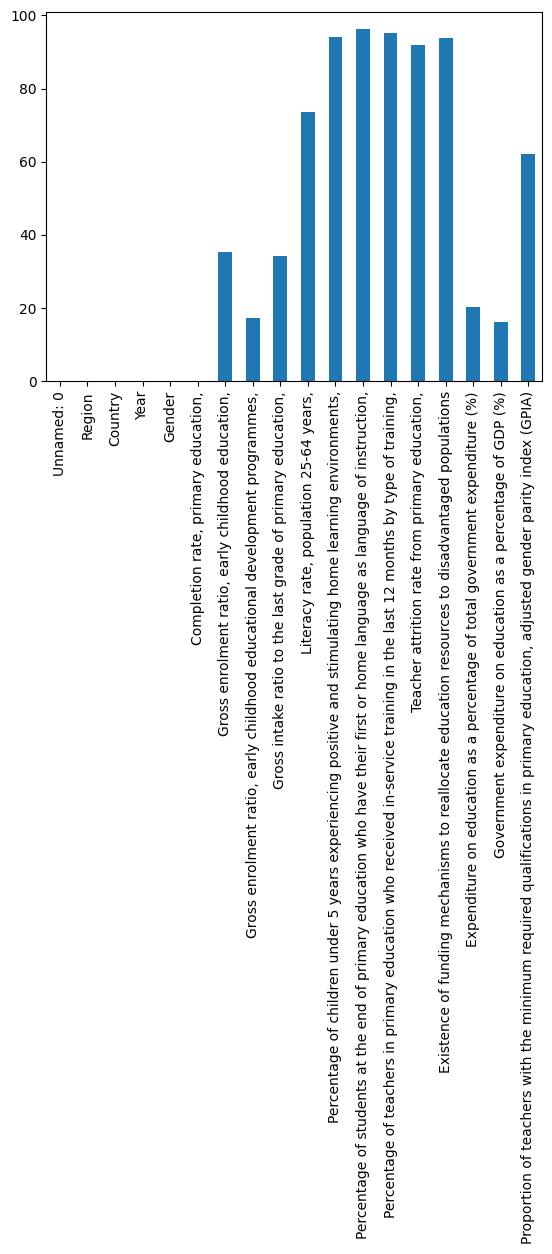

In [34]:
round((df3.isnull().sum()/len(df3) *100), 2).plot(kind='bar')

In [35]:
df3.columns

Index(['Unnamed: 0', 'Region', 'Country', 'Year', 'Gender',
       'Completion rate, primary education,',
       'Gross enrolment ratio, early childhood education,',
       'Gross enrolment ratio, early childhood educational development programmes,',
       'Gross intake ratio to the last grade of primary education,',
       'Literacy rate, population 25-64 years,',
       'Percentage of children under 5 years experiencing positive and stimulating home learning environments,',
       'Percentage of students at the end of primary education who have their first or home language as language of instruction,',
       'Percentage of teachers in primary education who received in-service training in the last 12 months by type of training,',
       'Teacher attrition rate from primary education,',
       'Existence of funding mechanisms to reallocate education resources to disadvantaged populations',
       'Expenditure on education as a percentage of total government expenditure (%)',
       '

Droping columns that has more than 90% missing values

In [36]:
df4= df3.drop(columns=[
       'Percentage of children under 5 years experiencing positive and stimulating home learning environments,',
       'Percentage of students at the end of primary education who have their first or home language as language of instruction,',
       'Percentage of teachers in primary education who received in-service training in the last 12 months by type of training,',
        'Teacher attrition rate from primary education,',
       'Existence of funding mechanisms to reallocate education resources to disadvantaged populations',
        'Proportion of teachers with the minimum required qualifications in primary education, adjusted gender parity index (GPIA)'])

In [37]:
print('The shape of is :', df4.shape)
round((df4.isnull().sum()/len(df3) *100), 2)

The shape of is : (1698, 12)


Unnamed: 0                                                                       0.00
Region                                                                           0.00
Country                                                                          0.00
Year                                                                             0.00
Gender                                                                           0.00
Completion rate, primary education,                                              0.00
Gross enrolment ratio, early childhood education,                               35.34
Gross enrolment ratio, early childhood educational development programmes,      17.20
Gross intake ratio to the last grade of primary education,                      34.28
Literacy rate, population 25-64 years,                                          73.62
Expenditure on education as a percentage of total government expenditure (%)    20.38
Government expenditure on education as a percentage of

<Axes: >

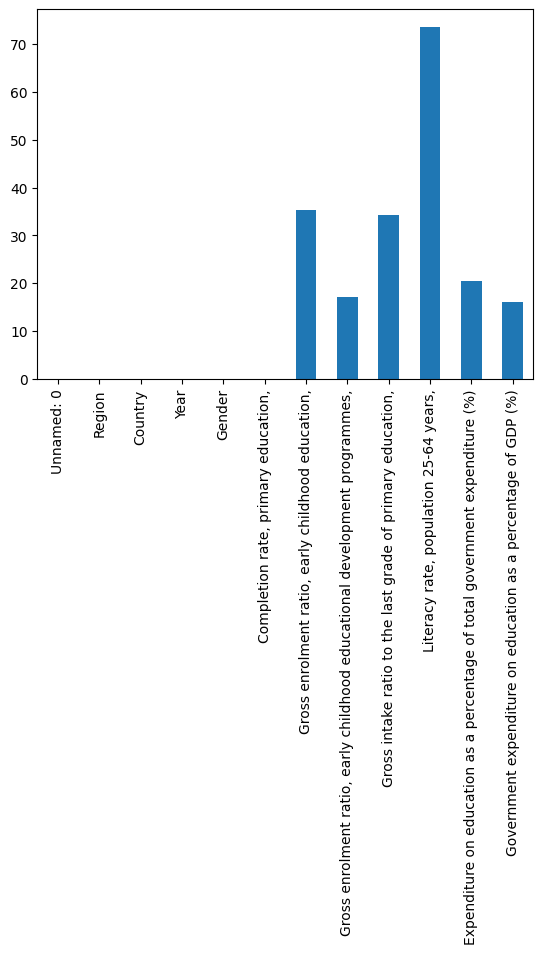

In [38]:
round((df4.isnull().sum()/len(df3) *100), 2).plot(kind="bar")

# Analysing "Literacy rate, population 25-64 years futher

In [39]:
mask_literacy= df4["Literacy rate, population 25-64 years,"].notna()
df5= df4[mask_literacy]
df5.head()

,Unnamed: 0,Region,Country,Year,Gender,"Completion rate, primary education,","Gross enrolment ratio, early childhood education,","Gross enrolment ratio, early childhood educational development programmes,","Gross intake ratio to the last grade of primary education,","Literacy rate, population 25-64 years,",Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%)
16,114,SDG: Central and Southern Asia,Kazakhstan,2020,female,99.90,55.76,28.22,101.44,99.80,20.16,4.45
17,115,SDG: Central and Southern Asia,Kazakhstan,2020,male,99.80,56.28,27.99,102.53,99.90,20.16,4.45
76,194,SDG: Central and Southern Asia,Uzbekistan,2021,female,99.70,43.36,0.00,100.81,100.00,21.43,4.62
77,195,SDG: Central and Southern Asia,Uzbekistan,2021,male,99.71,44.63,0.00,102.07,100.00,21.43,4.62
98,216,SDG: Central and Southern Asia,Bangladesh,2012,female,80.40,NaN,0.00,NaN,47.22,12.28,2.05


In [40]:
#df5.corr()

In [41]:
df4.head()

,Unnamed: 0,Region,Country,Year,Gender,"Completion rate, primary education,","Gross enrolment ratio, early childhood education,","Gross enrolment ratio, early childhood educational development programmes,","Gross intake ratio to the last grade of primary education,","Literacy rate, population 25-64 years,",Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%)
0,98,SDG: Central and Southern Asia,Kazakhstan,2012,female,99.8,NaN,NaN,108.19,NaN,19.25,3.90
1,99,SDG: Central and Southern Asia,Kazakhstan,2012,male,99.7,NaN,NaN,106.88,NaN,19.25,3.90
2,100,SDG: Central and Southern Asia,Kazakhstan,2013,female,99.9,NaN,NaN,109.76,NaN,17.96,3.44
3,101,SDG: Central and Southern Asia,Kazakhstan,2013,male,99.8,NaN,NaN,108.90,NaN,17.96,3.44
4,102,SDG: Central and Southern Asia,Kazakhstan,2014,female,99.9,36.65,0.0,115.17,NaN,17.32,3.42


In [42]:
#df4[["Completion rate, primary education", " Literacy rate, population 25-64 years"]]

In [43]:
df4["Literacy rate, population 25-64 years,"].describe()

count    448.000000
mean      82.345692
std       21.243773
min        8.640000
25%       73.782500
50%       91.900000
75%       96.262500
max      100.000000
Name: Literacy rate, population 25-64 years,, dtype: float64

afr looking at the decsrition of the columns, i think it will be better we filled the missing values with the 25 percentile

In [44]:
df4["Gross enrolment ratio, early childhood education,"].describe()
#Analyzing the Gross enrolment ratio, early childhood education, column

count    1098.000000
mean       46.379381
std        28.429668
min         0.720000
25%        22.670000
50%        42.880000
75%        66.410000
max       160.860000
Name: Gross enrolment ratio, early childhood education,, dtype: float64

In [45]:
df4["Gross enrolment ratio, early childhood educational development programmes,"].describe()
#Analyzing the "Gross enrolment ratio, early childhood educational development programmes, column

count    1406.000000
mean        6.361501
std        15.605866
min         0.000000
25%         0.000000
50%         0.000000
75%         2.082500
max        93.540000
Name: Gross enrolment ratio, early childhood educational development programmes,, dtype: float64

In [46]:
df4["Literacy rate, population 25-64 years,"] = df4["Literacy rate, population 25-64 years,"].fillna(df4["Literacy rate, population 25-64 years,"].quantile(0.25))
df4["Gross enrolment ratio, early childhood education,"] =df4["Gross enrolment ratio, early childhood education,"].fillna(df4["Gross enrolment ratio, early childhood education,"].mean())
df4["Expenditure on education as a percentage of total government expenditure (%)"] = df4["Expenditure on education as a percentage of total government expenditure (%)"].fillna(df4["Expenditure on education as a percentage of total government expenditure (%)"].mean())
df4["Government expenditure on education as a percentage of GDP (%)"] = df4["Government expenditure on education as a percentage of GDP (%)"].fillna(df4["Government expenditure on education as a percentage of GDP (%)"].mean())
df4["Gross intake ratio to the last grade of primary education,"] = df4["Gross intake ratio to the last grade of primary education,"].fillna(df4["Gross intake ratio to the last grade of primary education,"].mean())
df4["Gross enrolment ratio, early childhood educational development programmes,"] = df4["Gross enrolment ratio, early childhood educational development programmes,"].fillna(df4["Gross enrolment ratio, early childhood educational development programmes,"].mean())

In [47]:
print("The shape of the dataset is :", df4.shape)
round((df4.isnull().sum()/len(df3) *100), 2)

The shape of the dataset is : (1698, 12)


Unnamed: 0                                                                      0.0
Region                                                                          0.0
Country                                                                         0.0
Year                                                                            0.0
Gender                                                                          0.0
Completion rate, primary education,                                             0.0
Gross enrolment ratio, early childhood education,                               0.0
Gross enrolment ratio, early childhood educational development programmes,      0.0
Gross intake ratio to the last grade of primary education,                      0.0
Literacy rate, population 25-64 years,                                          0.0
Expenditure on education as a percentage of total government expenditure (%)    0.0
Government expenditure on education as a percentage of GDP (%)              

**Renaming the columns**

In [48]:
new_column_names = {'Completion rate, primary education,': 'Completion Rate for Primary Edu',
                    'Gross enrolment ratio, early childhood education,': 'Childhood Education GER',
                    'Gross enrolment ratio, early childhood educational development programmes': 'Gross enrolment ratio, early childhood educational development programmes',
                    'Gross intake ratio to the last grade of primary education': 'Last Grade Primary Edu GIR',
                    'Literacy rate, population 25-64 years,': 'Literacy rate for 25-64 years old'
                   }

df4.rename(columns=new_column_names, inplace=True)

In [49]:

df4.columns

Index(['Unnamed: 0', 'Region', 'Country', 'Year', 'Gender',
       'Completion Rate for Primary Edu', 'Childhood Education GER',
       'Gross enrolment ratio, early childhood educational development programmes,',
       'Gross intake ratio to the last grade of primary education,',
       'Literacy rate for 25-64 years old',
       'Expenditure on education as a percentage of total government expenditure (%)',
       'Government expenditure on education as a percentage of GDP (%)'],
      dtype='object')

In [50]:

df4.head()

,Unnamed: 0,Region,Country,Year,Gender,Completion Rate for Primary Edu,Childhood Education GER,"Gross enrolment ratio, early childhood educational development programmes,","Gross intake ratio to the last grade of primary education,",Literacy rate for 25-64 years old,Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%)
0,98,SDG: Central and Southern Asia,Kazakhstan,2012,female,99.8,46.379381,6.361501,108.19,73.7825,19.25,3.90
1,99,SDG: Central and Southern Asia,Kazakhstan,2012,male,99.7,46.379381,6.361501,106.88,73.7825,19.25,3.90
2,100,SDG: Central and Southern Asia,Kazakhstan,2013,female,99.9,46.379381,6.361501,109.76,73.7825,17.96,3.44
3,101,SDG: Central and Southern Asia,Kazakhstan,2013,male,99.8,46.379381,6.361501,108.90,73.7825,17.96,3.44
4,102,SDG: Central and Southern Asia,Kazakhstan,2014,female,99.9,36.650000,0.000000,115.17,73.7825,17.32,3.42


In [51]:
df4.shape

(1698, 12)

In [52]:

df4.to_csv('Preprocessed Primary Edu.csv', index=False)
#Saving the data